 Spam Detection Using Naive Bayes

INSTALLATION OF BASIC REQUIRED PACKAGES

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


IMPORTING REQUIRED LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

PRESENTATION OF DATASET USING PANDAS 

In [5]:
spam_dataset = pd.read_csv("spam.csv",encoding='latin-1')
spam_dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
spam_dataset.shape
spam_dataset["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

DATA PREPROCESSING

In [17]:
#Droping the column which is of no use 
spam_dataset.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4" ], axis=1, inplace=True)
spam_dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
#Renaming the column name  v1 as label and v2 as messages
spam_dataset = spam_dataset.rename(columns={"v1": "label", "v2" : "messages"})
#Replacing ham as 0 and spam as 1
spam_dataset["label"] = spam_dataset["label"].replace({'ham': 0, 'spam':1})
#converting messages string as lowercase
spam_dataset['messages'] = spam_dataset['messages'].str.lower()
#Removing everything except alphabetic characters (a–z, A–Z) and spaces.
#importing Python's built-in "re" module, which stands for regular expressions.
import re
spam_dataset['messages'] = spam_dataset['messages'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
spam_dataset.head()

,label,messages
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


Feature Engineering
importing the TF-IDF Vectorizer from Scikit-learn.
TF-IDF stands for Term Frequency–Inverse Document Frequency.
Its used to convert text into numerical features, which your model can understand.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(spam_dataset['messages'])
Y = spam_dataset['label']
print(X)

  (0, 7763)	0.19995345815712037
  (0, 229)	0.3506894305607562
  (0, 2802)	0.16457560558825957
  (0, 1220)	0.2962638480692937
  (0, 894)	0.33477096814205043
  (0, 3765)	0.2875032860269879
  (0, 7993)	0.24183826557783117
  (0, 2841)	0.19518886016165243
  (0, 896)	0.2962638480692937
  (0, 457)	0.26667094878285835
  (0, 1500)	0.2715848236082822
  (0, 5312)	0.2742934671141265
  (0, 3613)	0.3506894305607562
  (1, 4906)	0.5462557824449175
  (1, 7887)	0.4313385731102942
  (1, 3581)	0.5233273701797004
  (1, 3801)	0.4080505634471753
  (1, 4875)	0.2741803362458879
  (2, 5005)	0.25300034492756185
  (2, 311)	0.18185423392500233
  (2, 5658)	0.25300034492756185
  (2, 7424)	0.13595682991385358
  (2, 5605)	0.25300034492756185
  (2, 5712)	0.18010842259055138
  (2, 7066)	0.13286906777720367
  :	:
  (5567, 4622)	0.307299745225135
  (5567, 7963)	0.26681110333268226
  (5567, 1226)	0.24739384383142873
  (5567, 5476)	0.2598627865675996
  (5568, 2172)	0.6457639024659789
  (5568, 2528)	0.5628210076825846
  (556

In [ ]:
Data Analysis

) missing from current font.ib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


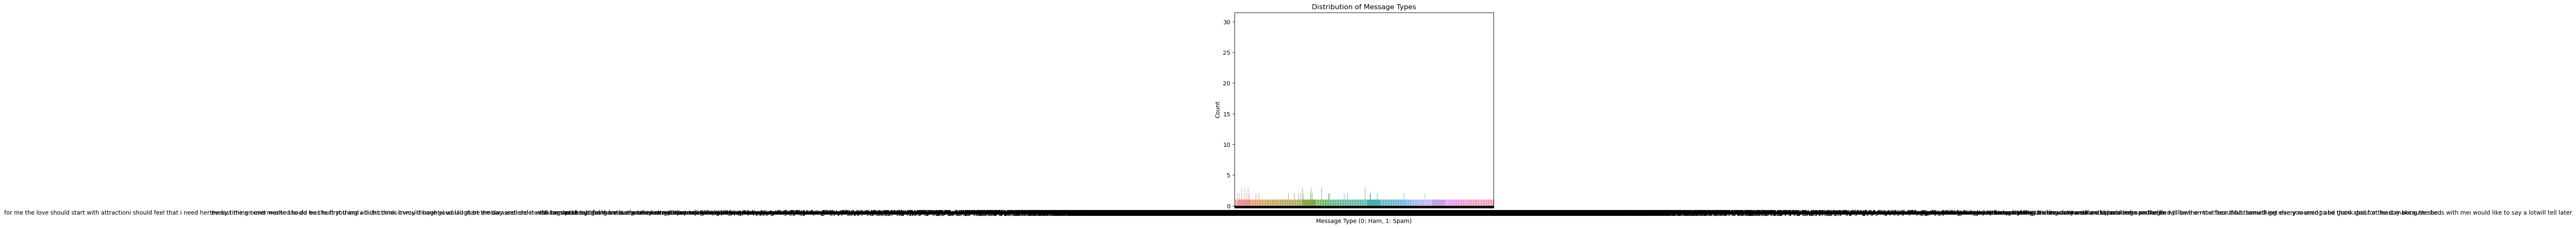

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='messages', data=spam_dataset)
plt.title('Distribution of Message Types')
plt.xlabel('Message Type (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

In [49]:
from wordcloud import WordCloud

ham_words = ' '.join(spam_dataset[spam_dataset['label'] == 0]['messages'])
spam_words = ' '.join(spam_dataset[spam_dataset['label'] == 1]['messages'])

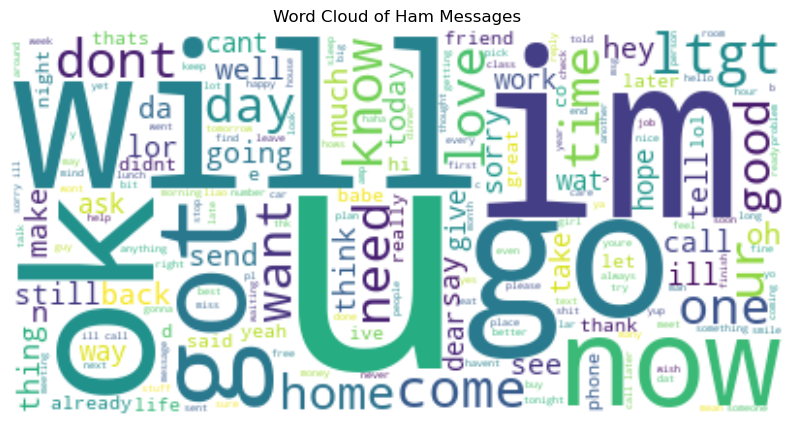

In [57]:
# Create and display the word cloud for ham messages
wordcloud_ham = WordCloud(width=400, height=200, background_color='white').generate(ham_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Ham Messages')
plt.show()

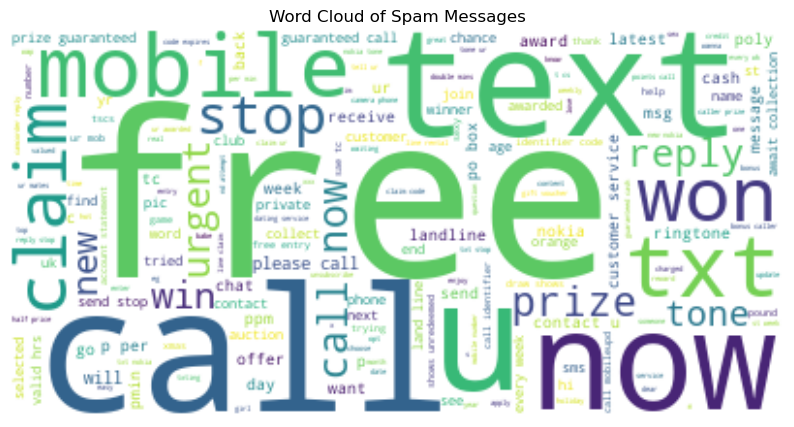

In [65]:
2
wordcloud_spam = WordCloud(width=400, height=200, background_color='white').generate(spam_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spam Messages')
plt.show()

TRAINING MODEL 

In [71]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(5572, 8245) (4457, 8245) (1115, 8245)


In [73]:
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

MultinomialNB()

MODEL EVALUATION AND ACCURACY SCORE

In [77]:
#accuracy score for training dataset
X_train_prediction = classifier.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("accuracy score for train dataset: ", train_data_accuracy) 

accuracy score for train dataset:  0.9768902849450303


In [79]:
#accuracy score for  testing dataset
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy score for test data: ", test_data_accuracy)

Accuracy score for test data:  0.9623318385650225


Save the Model (Optional for Deployment)

In [83]:
import joblib

joblib.dump(classifier, 'spam_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [85]:
import re
user_input = input("Enter a message to check if it's spam or ham: ")
user_input = re.sub(r'[^a-zA-Z\s]', '', user_input)
vectorized = vectorizer.transform([user_input])
prediction = classifier.predict(vectorized)[0]

print("HAM" if prediction == 0 else "SPAM")


Enter a message to check if it's spam or ham:  from www.Applausestore.com MonthlySubscription@50p/msg max6/month T&CsC web age16 2stop txt stop,,,


SPAM
